# Lecture 12 (Continued) & 13

## Adaptive Integration using Recursion

The adaptive trapezoidal rule is a numerical method used to approximate definite integrals, particularly useful when dealing with functions that change rapidly or have singularities. Unlike the standard trapezoidal rule, which divides the integration interval into equal parts, the adaptive version recursively subdivides the interval, allocating more subdivisions where the function exhibits greater variability. The process begins by estimating the integral over the entire interval. If the estimated error exceeds a predefined tolerance, the interval is split at the midpoint, and the method is applied recursively to each subinterval. This approach ensures finer partitions in regions where the function changes rapidly, leading to more accurate integral approximations. When dealing with functions that have singularities, for example, e.g. $1/\sqrt{x}$ at $x = 0$, it's important to avoid evaluating the function at points where it becomes undefined or infinite. In such cases, starting the integration from a small positive value close to the singularity (for example, $10^{-6}$) helps with numerical stabilty.

### Problem 9

1. Integrations: Trapezoidal and Simpson's 1/3 

   (a) Direct Implementation (Done in Part 1)

   (b) Adaptive Integration 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def func(x):
    return 1/np.sqrt(x)

In [7]:
def adaptive_trapezoid(func, a, b, tol):
    mid = (a + b)/2 # midpoint
    fa, fm, fb = func(a), func(mid), func(b)
    
    I1 = (b - a)/2 * (fa + fb) # we are finding the trapezoidal estimate over the entire interval [a, b]
    I2 = (mid - a)/2 * (fa + fm) + (b - mid)/2 * (fm + fb) # computing the trapezoidal estimates over the two subintervals [a, mid] and [mid, b]
    
    if abs(I2 - I1) < tol:
        return I2  # if the estimates are sufficiently close, we accept it
    else:
        return adaptive_trapezoid(func, a, mid, tol/2) + adaptive_trapezoid(func, mid, b, tol/2)

In [8]:
result = adaptive_trapezoid(func, 1e-6, 3*np.pi/2, 1e-6)
print('I =', result)

I = 4.339607709017281


## Random Numbers

Here, we will be generating numbers in a probabilistic manner bust still based on a particular programme, so we have *pseudorandom* numbers. Every random number generation process has a starting point called a 'seed'. If we know the seed, we can easily reproduce the sequence of numbers. However, we will have some sort of periodicity in the sequence. Say we need $N$ random numbers. It should be such that $N <<$ periodicity of RNG.

The most basic RNG is the uniform distribution $[0, 1)$ and everything else is based on this. A uniform distribution is given by $P(x)$ for $x$ randomly distributed in $[0, 1)$. The probability of an event $X$ in the range $(x, x + dx) = p(x)dx$. So, $P(x) = 1$. This is normalised

$\int_{0}^{1} P(x)dx = \int_{0}^{1}dx = 1$

If we have random numbers in the rage $[0, 1)$ and we want to convert to numbers in the range $[a, b)$, we can use a transformation like $y = a + x(b - a)$.

### Problem 9

2. Use of random numbers:  Generate uniform random numbers and draw the histogram. Check the flatness of the obtained probability density.

In [1]:
def rng(N):
    rn = []
    for i in range(0, N):
        rn.append(np.random.random())
    return rn

In [30]:
N = 10000 # number of random numbers
bin_size = 0.01  # width of each bin
bins = int(1/bin_size)  # number of bins

rand_num = rng(N) # generating random numbers

In [31]:
for i in rand_num:
    print(i)

0.9440177310285895
0.18849792674671395
0.37848719347876947
0.03272133002605193
0.7634301748007318
0.9330297238499123
0.0715370074917061
0.5117006762389625
0.30632964256012674
0.6511908295109218
0.5745959236729598
0.872125261238138
0.7046490781134118
0.654436728898931
0.6548399971909473
0.1340436152739528
0.7381246304234823
0.4822574712353943
0.5663357004681825
0.5260846600953427
0.9161744377635168
0.8035012268333566
0.9260922663381418
0.5192791429752569
0.038851210793053204
0.9694206766286125
0.6140625000241244
0.7762838925686026
0.2945165255017598
0.9294798869476645
0.33391510215668485
0.07433887021517083
0.28337044026755986
0.382898707926542
0.729331328561996
0.6860108697685974
0.016034474996503567
0.36509114284154354
0.1699303905356313
0.525826618436664
0.8305667264830515
0.42988157219575174
0.22261386821277085
0.5164926173245018
0.22776664486586085
0.13743127539807187
0.3573316414677762
0.5782106385166658
0.6778655734358578
0.5769872365725891
0.7519515713003079
0.630068992491262
0.

In [32]:
freq = np.zeros(bins) # frequency

for r in rand_num:
    index = int(r/bin_size) # bin index for every random number
    if index == bins:
        index -= 1 # to handle edge case where r == 1.0
    freq[index] += 1

bin_edges = np.linspace(0, 1, bins + 1)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

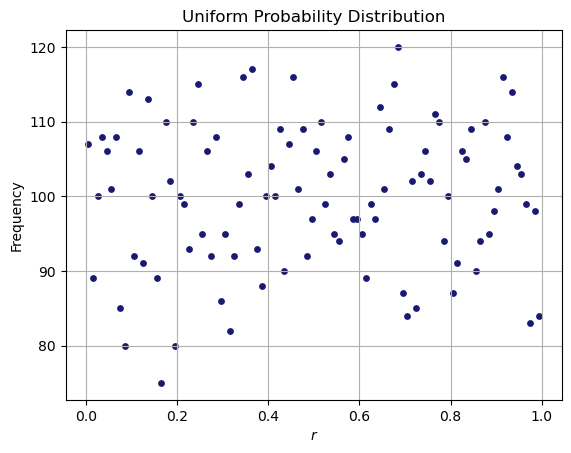

In [37]:
plt.scatter(bin_centres, freq, color = 'midnightblue', s = 15)
plt.xlabel(r'$r$')
plt.ylabel('Frequency')
plt.title('Uniform Probability Distribution')
plt.grid(True)
plt.show()

In [34]:
print(len(freq), len(bin_centres))

100 100
